<a href="https://colab.research.google.com/github/abs711/Data-Analysis/blob/main/Qualifying_Red_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path_to_train = '/content/drive/My Drive/AMATH 582/Ass3/wine_training.csv'
path_to_test = '/content/drive/My Drive/AMATH 582/Ass3/wine_test.csv'
path_to_new = '/content/drive/My Drive/AMATH 582/Ass3/wine_new_batch.csv'


df_train = pd.read_csv(path_to_train, sep=',',header=None)
#np.loadtxt(path_to_train)
df_test = pd.read_csv(path_to_test, sep=',',header=None)
df_new = pd.read_csv(path_to_new, sep=',',header=None)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.1,0.60,0.08,1.8,0.071,14.0,45.0,0.99336,3.38,0.54,11.0,5.0
1,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6.0
2,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6.0
3,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5,5.0
4,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,5.0
1111,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,5.0
1112,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6.0
1113,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0,6.0


In [ ]:
d_train = np.array(df_train)
d_test = np.array(df_test)
d_new = np.array(df_new)
X = d_train[:,0:11]
Y = d_train[:,11]

print('X:', X.shape)
print('Y:', Y.shape)

X: (1115, 11)
Y: (1115,)


In [ ]:
pca = PCA(n_components=11)
pca.fit(d_train)

PCA(n_components=11)

In [ ]:
import plotly.graph_objs as go


fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 11, 11),
    y=pca.explained_variance_ratio_)])


# tight layout
fig.update_layout(xaxis_title= "Principal Component", yaxis_title= "variance explained ratio",width=800, height=400)

fig.show()

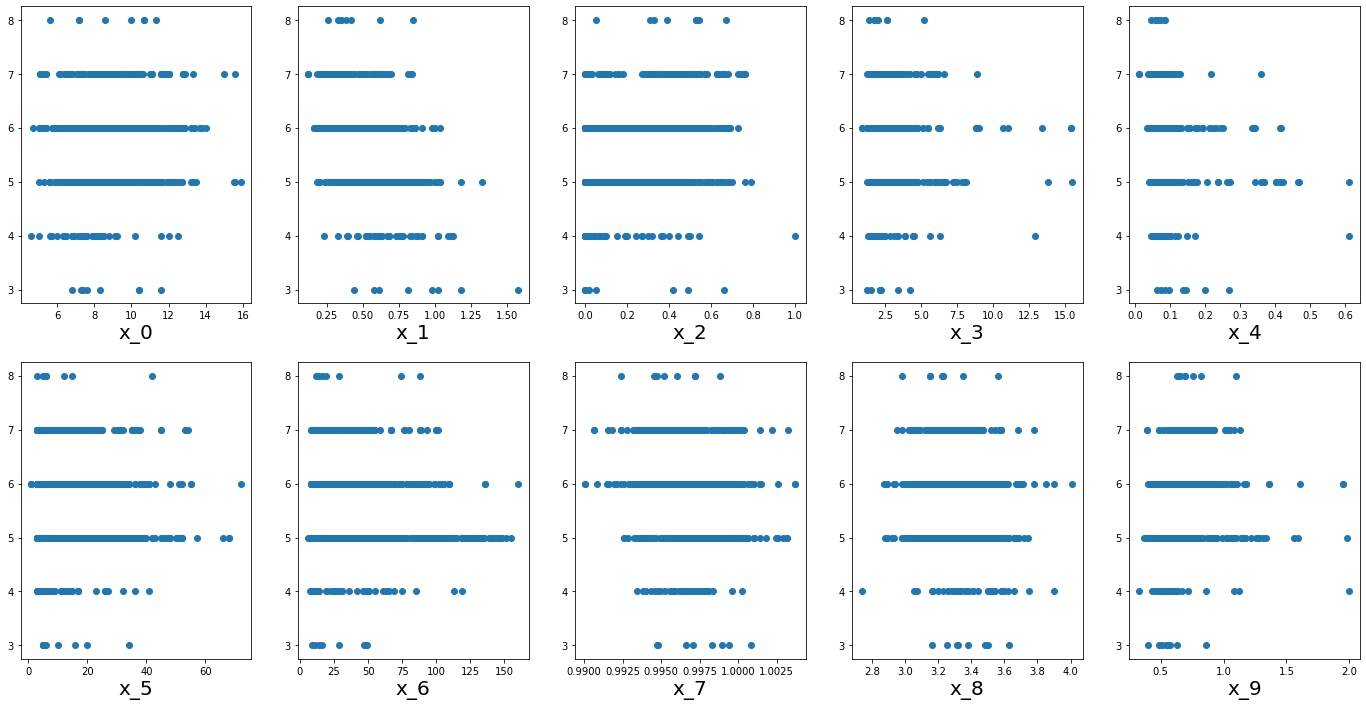

In [ ]:
#Plotting features
fig, ax = plt.subplots(2,5, figsize=(24,12))

for j in range(2):
  for i in range(5):

    ax[j][i].scatter( X[:, i+ j*5], Y )
    ax[j][i].set_xlabel('x_'+str(i + j*5), fontsize=20)

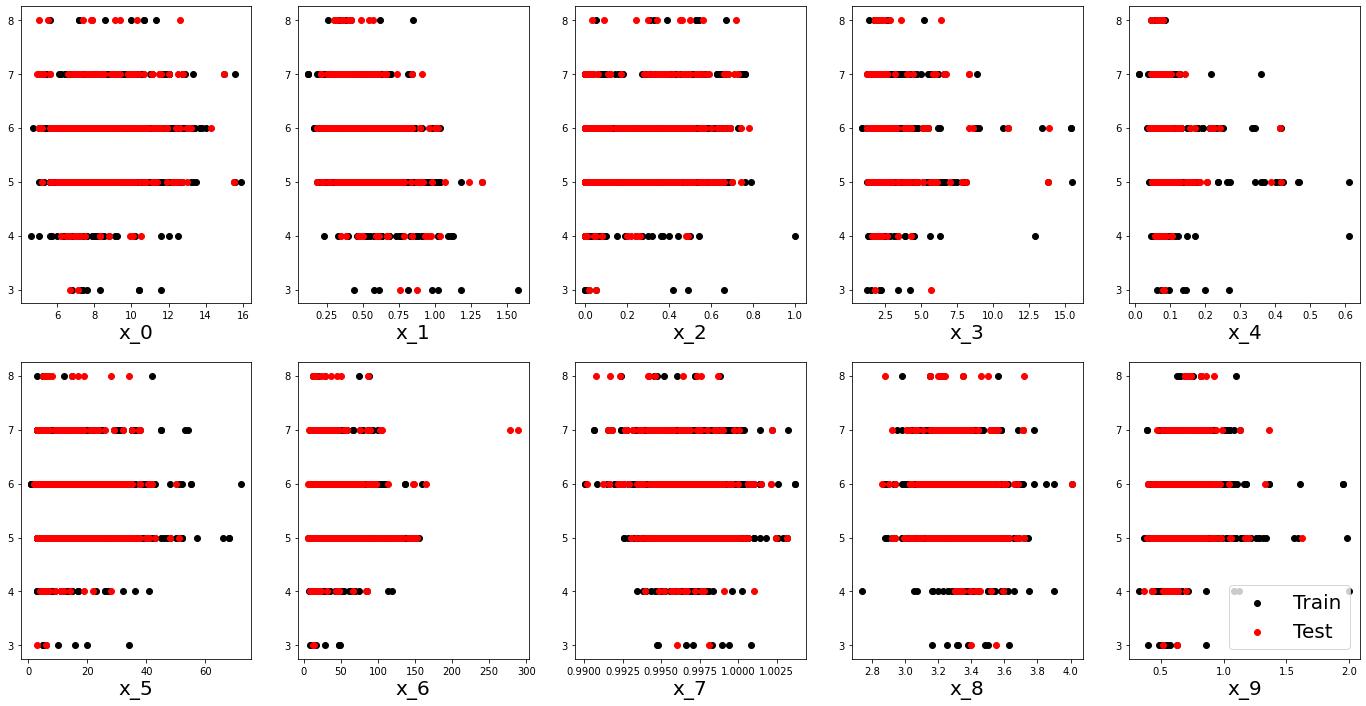

In [ ]:
import sklearn as skl
import sklearn.model_selection

# test_size is a number between 0.0 and 1.0, the ratio of test set to entire data set
#X_train, X_test, Y_train, Y_test = skl.model_selection.train_test_split(X, Y, test_size=0.15, random_state=10 )

X_train = d_train[:,0:11]
Y_train = d_train[:,11]
X_test = d_test[:,0:11]
Y_test = d_test[:,11]
X_new = d_new[:,0:11]


# plot the training and test sets 

fig, ax = plt.subplots(2,5, figsize=(24,12))

for j in range(2):
  for i in range(5):

    ax[j][i].scatter( X_train[:, i+ j*5], Y_train, color='k', label='Train' )
    ax[j][i].scatter( X_test[:, i+ j*5], Y_test, color='r', label='Test')
    ax[j][i].set_xlabel('x_'+str(i + j*5), fontsize=20)

plt.legend(fontsize=20)

(1115, 11)
(1115,)


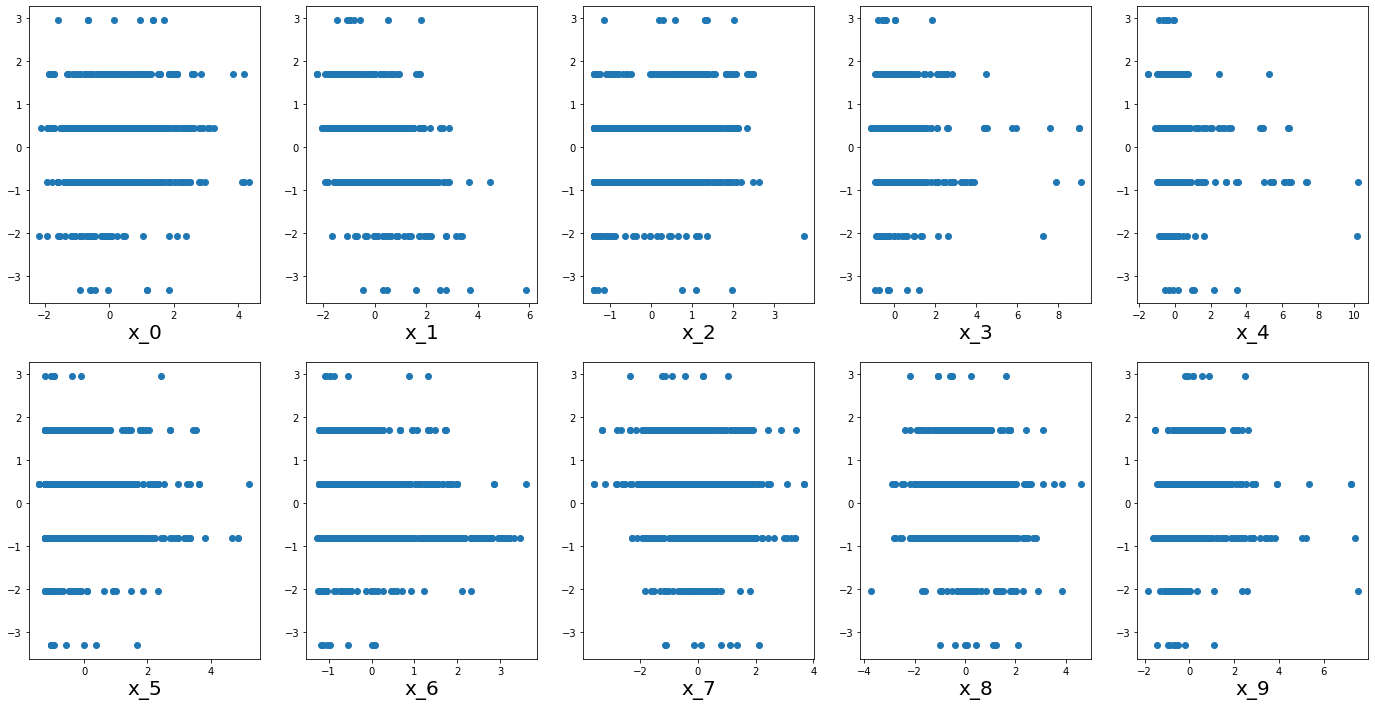

In [ ]:
import numpy.matlib

# Next we normalize and center the training set

X_train_N = X_train.shape[0]

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_normal = (X_train - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)

Y_train_N = Y_train.shape[0]

Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)

Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

print(X_train_normal.shape)
print(Y_train_normal.shape)

fig, ax = plt.subplots(2,5, figsize=(24,12))

for j in range(2):
  for i in range(5):

    ax[j][i].scatter( X_train_normal[:, i+ j*5], Y_train_normal )
    ax[j][i].set_xlabel('x_'+str(i + j*5), fontsize=20)

In [ ]:
np.mean(X_test_normal, axis=0)

array([-0.04808402,  0.05132136, -0.04410712, -0.03461896, -0.11437978,
       -0.10155726,  0.00931412, -0.14817185, -0.00321883, -0.05565014,
        0.0789232 ])

In [ ]:
# while we're here we also normalize and center the test set. 
# NOTE: the shift and scaling here are those computed on the training set 
X_test_N = X_test.shape[0]

X_test_normal = (X_test - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std


X_new_N = X_new.shape[0]

X_new_normal = (X_new - np.matlib.repmat(X_train_mean, X_new_N, 1))/np.matlib.repmat(X_train_std, X_new_N, 1)


In [ ]:
np.matlib.repmat(X_train_std, X_new_N, 1)

array([[1.73802726e+00, 1.78924336e-01, 1.95148774e-01, 1.42389434e+00,
        5.11090930e-02, 1.06931743e+01, 3.14087940e+01, 1.87298299e-03,
        1.52519210e-01, 1.78183748e-01, 1.04853788e+00],
       [1.73802726e+00, 1.78924336e-01, 1.95148774e-01, 1.42389434e+00,
        5.11090930e-02, 1.06931743e+01, 3.14087940e+01, 1.87298299e-03,
        1.52519210e-01, 1.78183748e-01, 1.04853788e+00],
       [1.73802726e+00, 1.78924336e-01, 1.95148774e-01, 1.42389434e+00,
        5.11090930e-02, 1.06931743e+01, 3.14087940e+01, 1.87298299e-03,
        1.52519210e-01, 1.78183748e-01, 1.04853788e+00],
       [1.73802726e+00, 1.78924336e-01, 1.95148774e-01, 1.42389434e+00,
        5.11090930e-02, 1.06931743e+01, 3.14087940e+01, 1.87298299e-03,
        1.52519210e-01, 1.78183748e-01, 1.04853788e+00],
       [1.73802726e+00, 1.78924336e-01, 1.95148774e-01, 1.42389434e+00,
        5.11090930e-02, 1.06931743e+01, 3.14087940e+01, 1.87298299e-03,
        1.52519210e-01, 1.78183748e-01, 1.04853788e+

In [ ]:

X_new_normal

array([[-1.23809253, -1.76094678,  0.08277001, -0.66998723, -0.9834937 ,
         0.73346315,  1.45223673, -3.04032411, -0.26726031, -0.90368748,
         0.7658326 ],
       [-1.00794654, -1.14616177,  0.4414707 ,  3.82472828, -0.82696578,
         3.81954397,  3.87194123, -1.03283124, -1.05404645, -1.12817484,
        -0.76010179],
       [-1.06548304, -1.59327814, -0.42965955, -0.95090695, -0.94436172,
         1.29456876,  2.05716286, -2.29285336, -2.10309463, -1.12817484,
        -0.95084359],
       [-1.640848  , -1.31383041,  0.13401297, -1.02113688, -1.31611553,
         0.35939275,  2.02532464, -4.34839793,  0.19169827, -1.57714957,
         2.29176698],
       [-1.35316552, -1.76094678,  0.54395661, -1.23182667, -1.35524751,
         0.54642795,  1.64326604, -3.9639844 , -0.33282582, -1.91388062,
         1.33805799]])

Train RMSE Linear 0.6278484956554882
Test RMSE Linear 0.7471696905187208


No handles with labels found to put in legend.


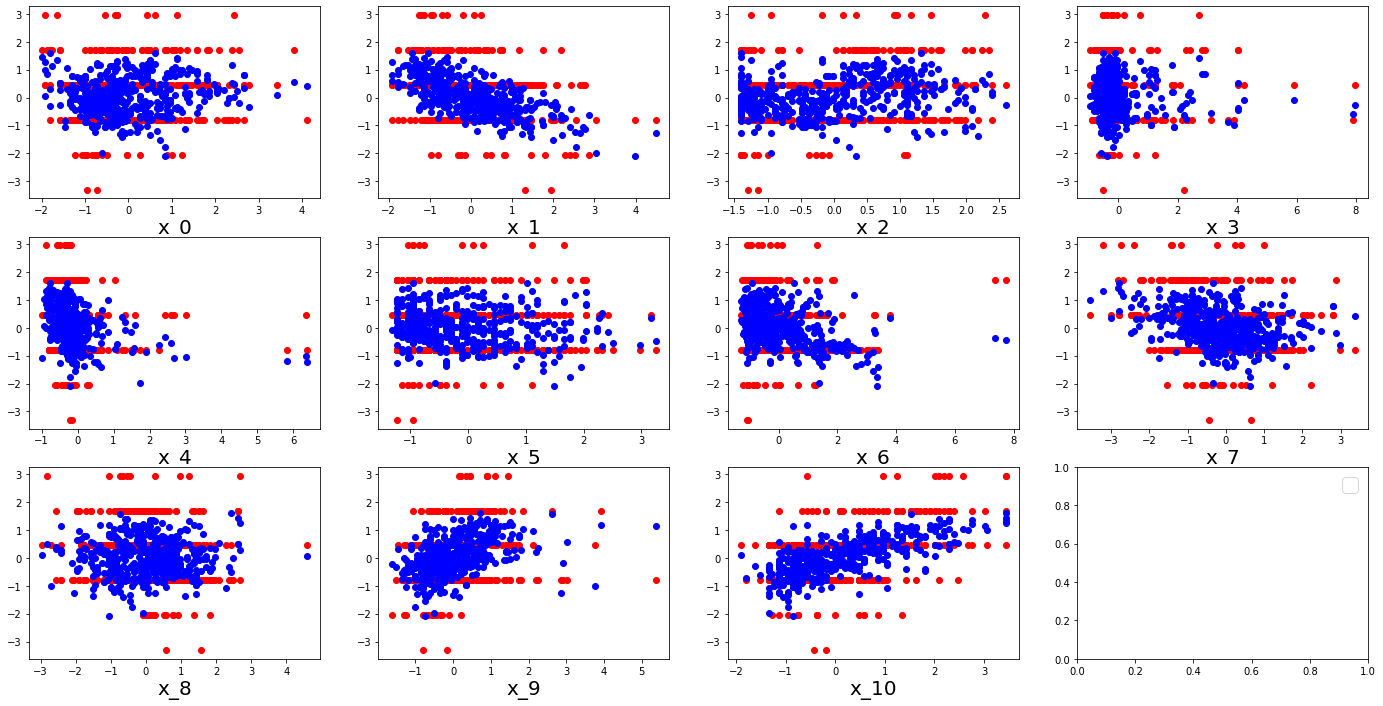

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train_normal, Y_train_normal)

print("Train RMSE Linear",mean_squared_error(reg.predict(X_train_normal),Y_train_normal))
print("Test RMSE Linear",mean_squared_error(reg.predict(X_test_normal),Y_test_normal))

Y_pred_normal = reg.predict(X_test_normal)

# plot the predicted values of Y against the test set

fig, ax = plt.subplots(3,4, figsize=(24,12))

for j in range(3):
  for i in range(4):
    if i+ j*4 <11:
      ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_test_normal, color='r', label='Test' )
      ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_pred_normal, color='b', label='Prediction' )
      ax[j][i].set_xlabel('x_'+str(i + j*4), fontsize=20)

plt.legend(fontsize=20)



In [ ]:
Y_pred_normal = reg.predict(X_new_normal)
Y_train_std*Y_pred_normal+Y_train_mean

array([6.00469789, 5.28767761, 5.56363072, 6.067022  , 5.94248207])

Train RMSE Gaussian Kernal 0.45645219468386117
Test RMSE Gaussian Kernal 0.6816866155675941


No handles with labels found to put in legend.


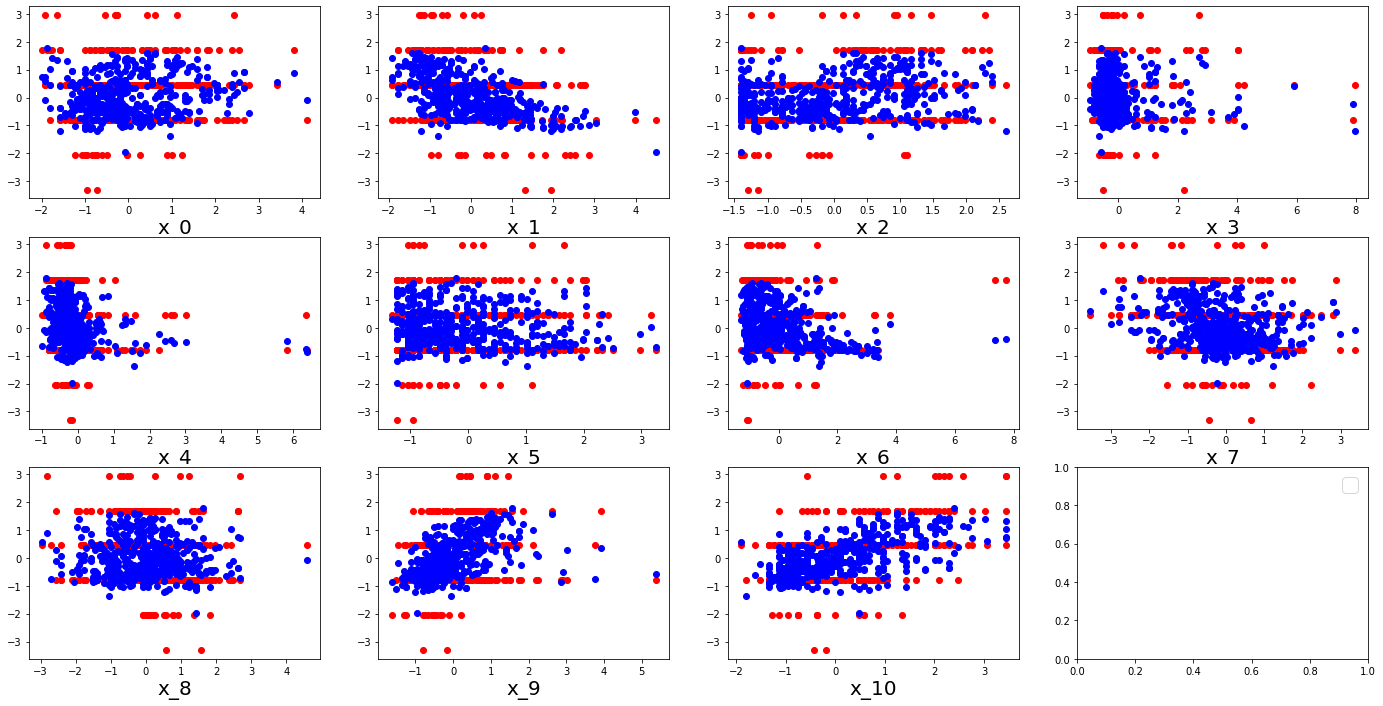

In [ ]:

import sklearn.kernel_ridge

# see https://scikit-learn.org/stable/modules/metrics.html#metrics for possible choices of kernels
sigma = 2**1.96#1#1.88 #1.77





KRR = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha = 2**-2.61, gamma=1/(2*sigma**2))#2.55

KRR.fit(X_train_normal, Y_train_normal)

print("Train RMSE Gaussian Kernal",mean_squared_error(KRR.predict(X_train_normal),Y_train_normal))
print("Test RMSE Gaussian Kernal",mean_squared_error(KRR.predict(X_test_normal),Y_test_normal))

# use our fitted model to predict the Y values on the test set 
Y_pred_normal = KRR.predict(X_test_normal)

# plot the predicted values of Y against the test set

fig, ax = plt.subplots(3,4, figsize=(24,12))

for j in range(3):
  for i in range(4):
    if i+ j*4 <11:
      ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_test_normal, color='r', label='Test' )
      ax[j][i].scatter( X_test_normal[:, i+ j*4], Y_pred_normal, color='b', label='Prediction' )
      ax[j][i].set_xlabel('x_'+str(i + j*4), fontsize=20)

plt.legend(fontsize=20)


In [ ]:
Y_pred_normal = KRR.predict(X_new_normal)
Y_train_std*Y_pred_normal+Y_train_mean

array([5.98286771, 5.44353458, 5.34284893, 6.12550809, 6.04898074])

In [ ]:
# range of values of sigma to try 


K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.8, 2.3, K_sgm) #-20 20, -2 7, 1 3, 2 4, 1 8, -2 4
lmbd = np.linspace(-3, -2.5, K_lmbd) #-20 20, -20 -10, -30 -18, -25 0, -4 2

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

In [ ]:
print(scores)

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()

print(ij_max)

print(scores.max())

print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])

[[-0.59764013 -0.59741284 -0.59720158 -0.59700604 -0.5968259  -0.59666086
  -0.59651062 -0.59637489 -0.59625339 -0.59614584]
 [-0.59694917 -0.59677191 -0.59660973 -0.59646233 -0.59632942 -0.59621073
  -0.59610598 -0.59601489 -0.59593719 -0.59587262]
 [-0.59639953 -0.59627085 -0.59615646 -0.59605608 -0.59596942 -0.59589621
  -0.59583618 -0.59578904 -0.59575454 -0.59573239]
 [-0.59600075 -0.59592031 -0.59585343 -0.59579981 -0.59575917 -0.59573122
  -0.59571568 -0.59571227 -0.59572069 -0.59574067]
 [-0.59577112 -0.59573897 -0.59571958 -0.59571265 -0.59571788 -0.59573495
  -0.59576357 -0.59580344 -0.59585425 -0.5959157 ]
 [-0.59573345 -0.59574927 -0.59577693 -0.59581609 -0.59586643 -0.59592763
  -0.59599936 -0.59608129 -0.59617312 -0.59627451]
 [-0.59590998 -0.59597246 -0.59604565 -0.5961292  -0.59622278 -0.59632603
  -0.59643862 -0.59656021 -0.59669047 -0.59682906]
 [-0.59631731 -0.59642366 -0.59653941 -0.59666419 -0.59679765 -0.59693944
  -0.59708922 -0.59724662 -0.59741132 -0.59758296]


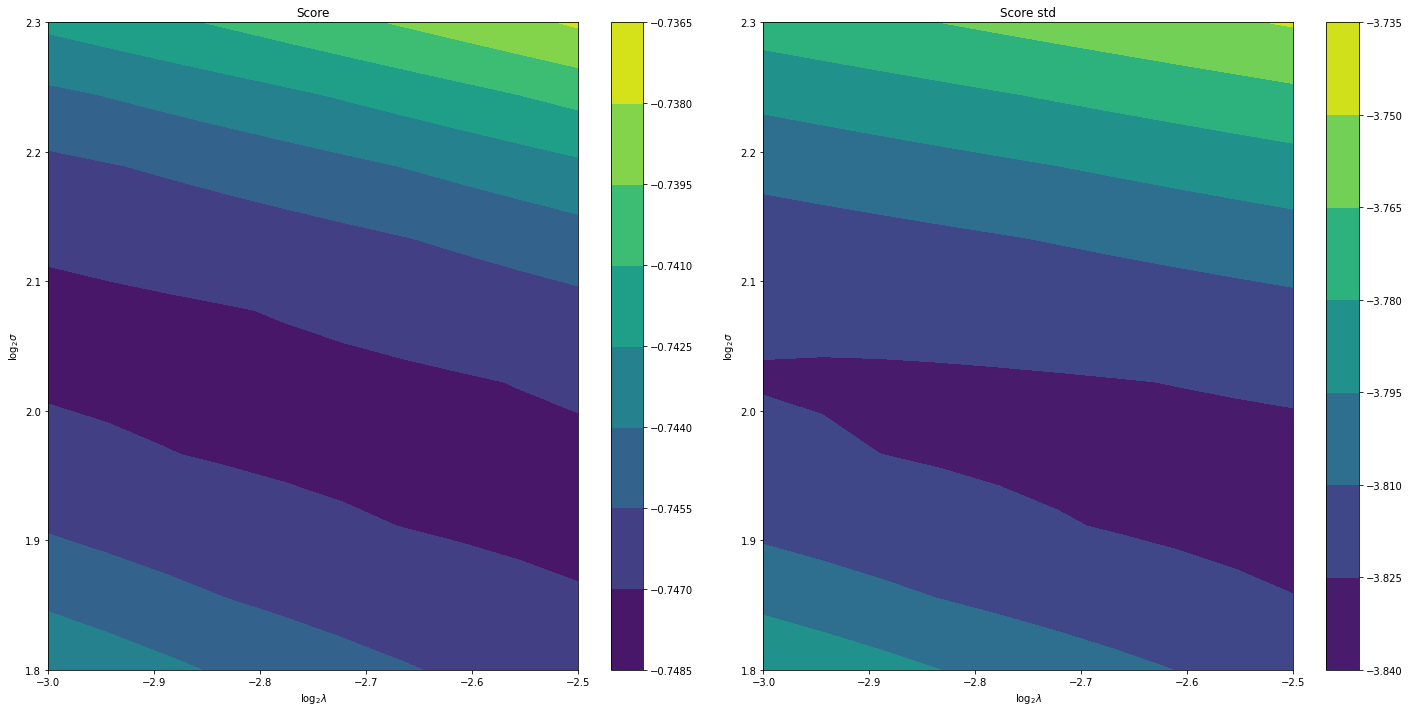

In [ ]:
lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

In [ ]:
np.min(np.log2(np.abs(scores)))

-0.7472463350005459

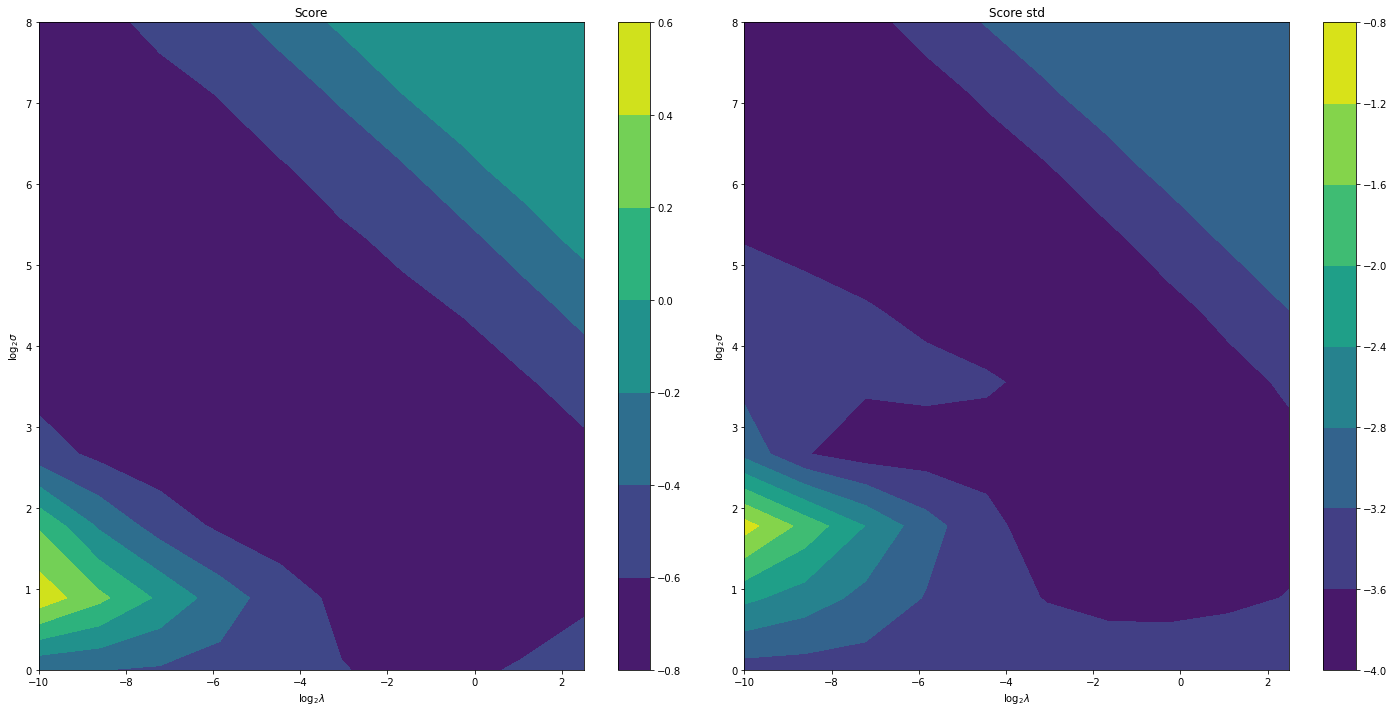

In [ ]:

lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

In [ ]:
# range of values of sigma to try 


K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1, 2, K_sgm)
lmbd = np.linspace(-2, 0, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

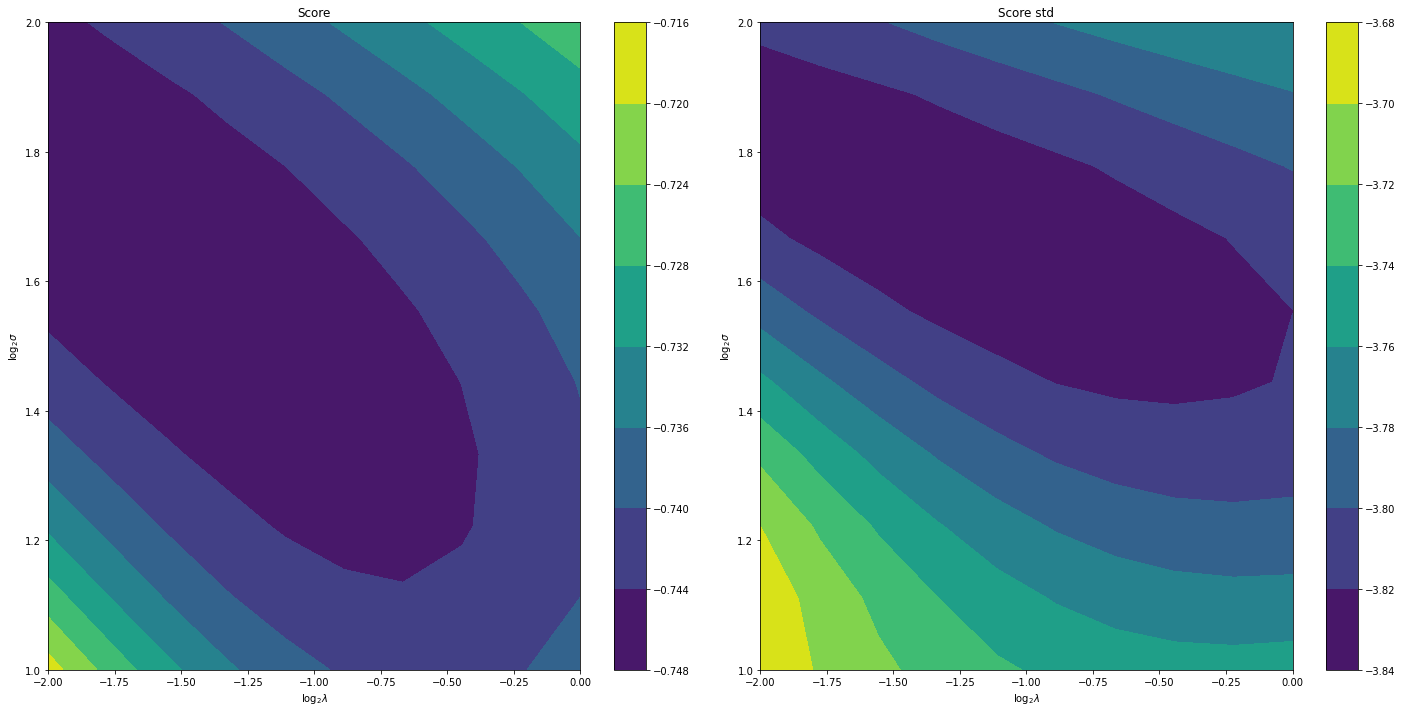

In [ ]:

lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

In [ ]:
# range of values of sigma to try 


K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.2, 2, K_sgm)
lmbd = np.linspace(-2, -0.5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

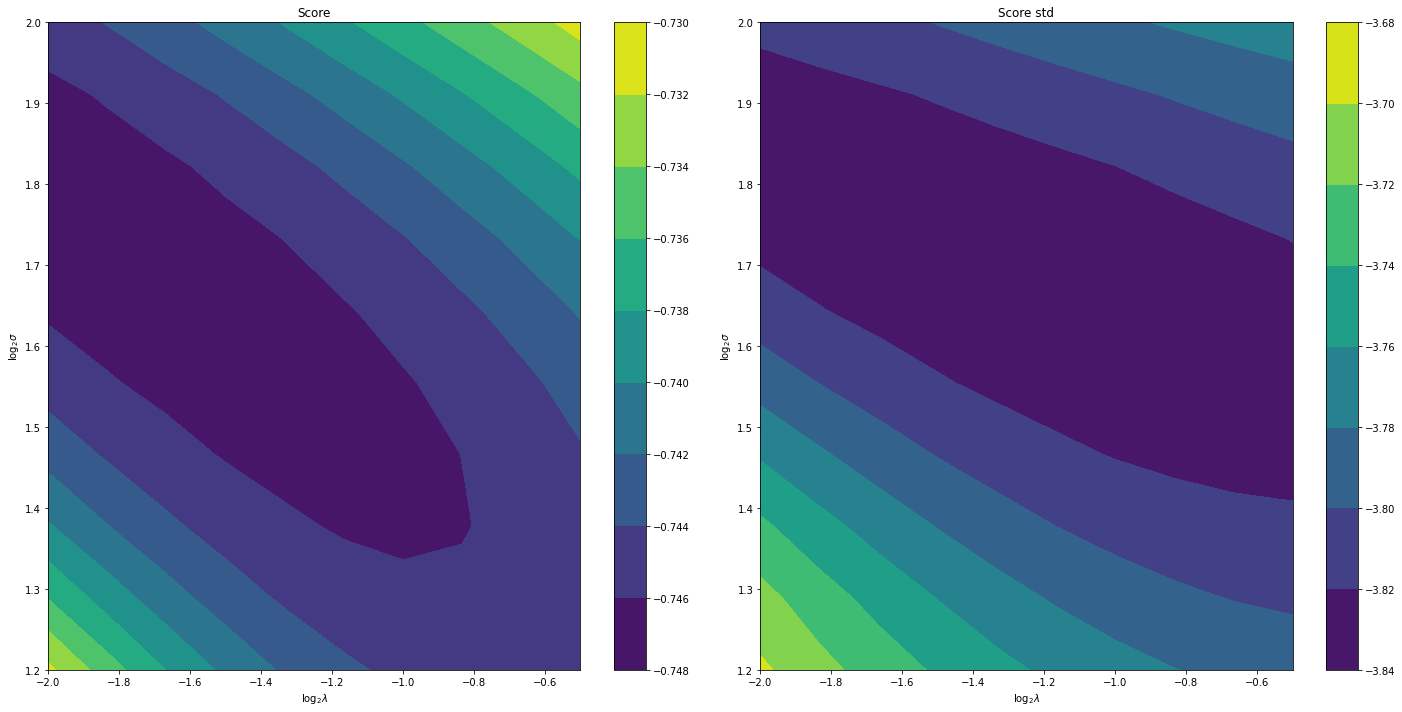

In [ ]:
lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

In [ ]:
# range of values of sigma to try 


K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.4, 1.9, K_sgm)
lmbd = np.linspace(-2, -1, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

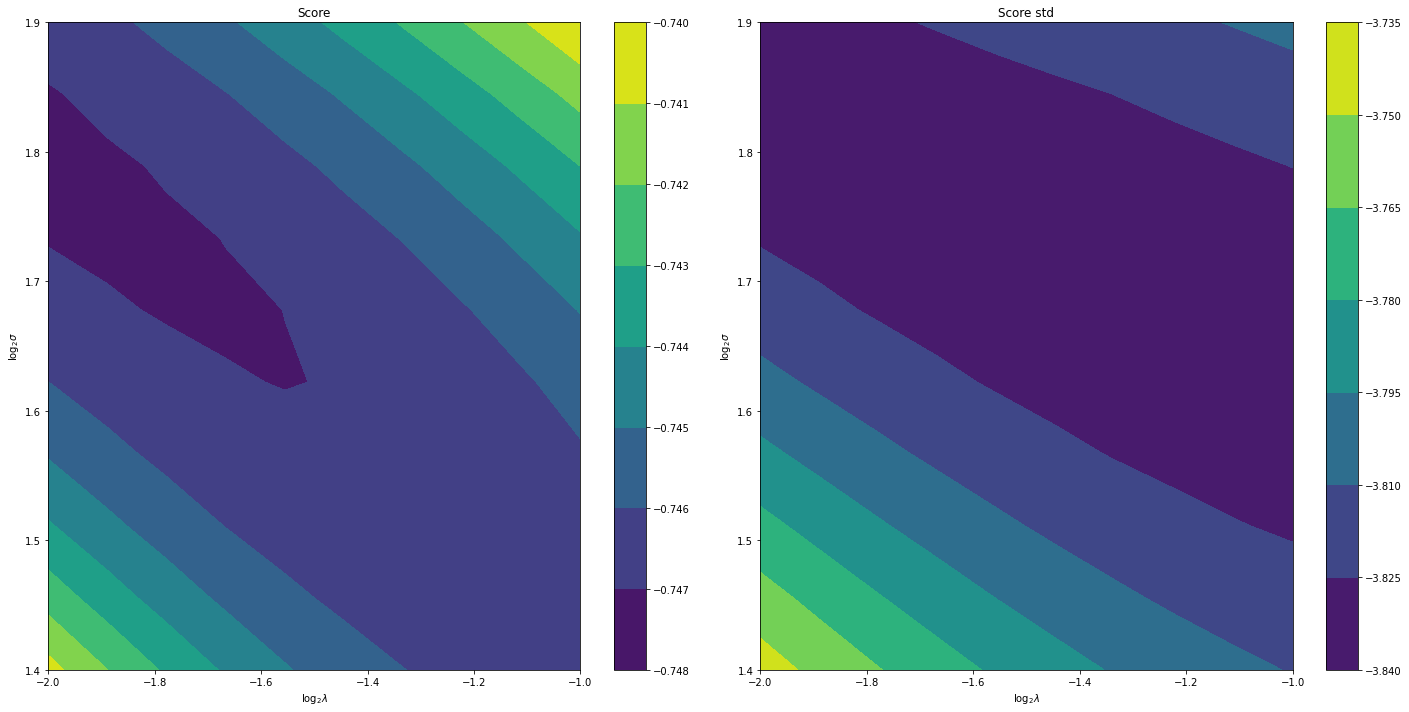

In [ ]:
lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

In [ ]:
# range of values of sigma to try 


K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.65, 1.85, K_sgm)
lmbd = np.linspace(-2, -1.6, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

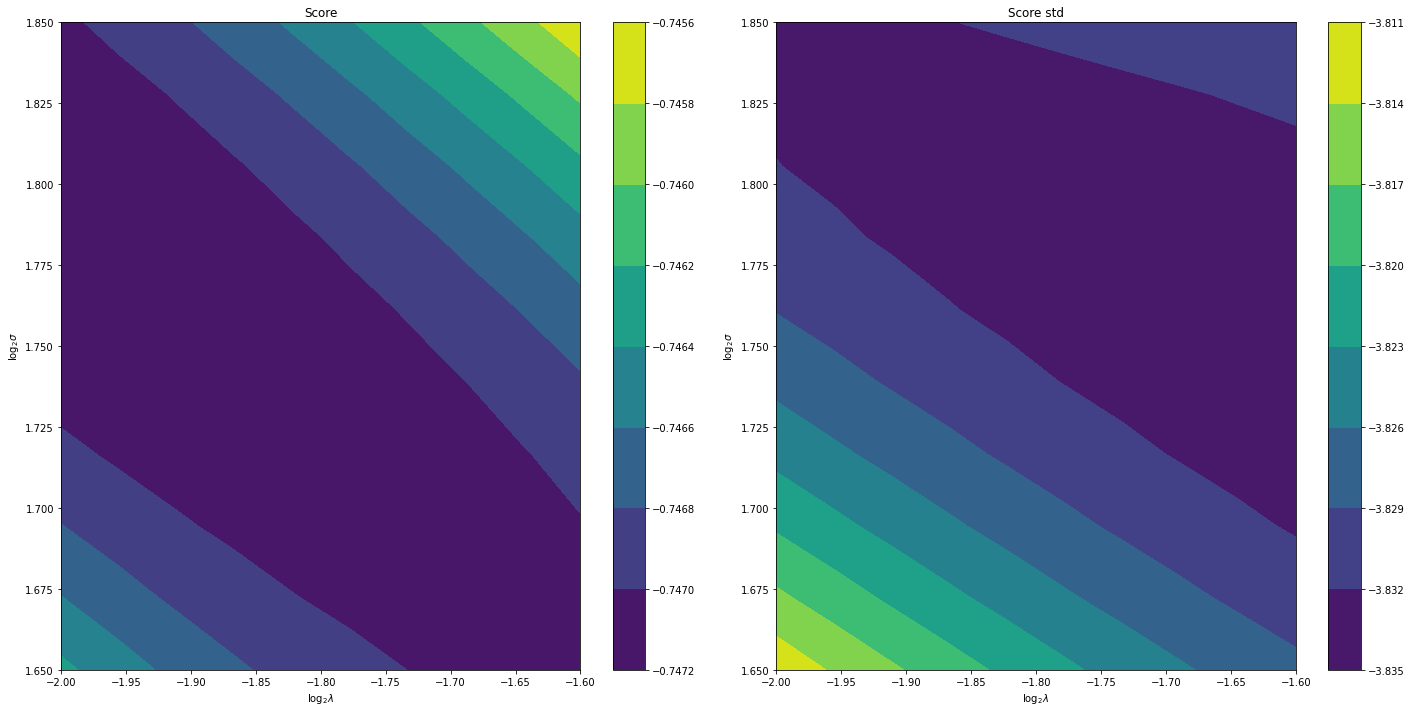

In [ ]:
lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()

Train RMSE Laplacian Kernal 0.050417851179733755
Test RMSE Laplacian Kernal 0.6068825739251924


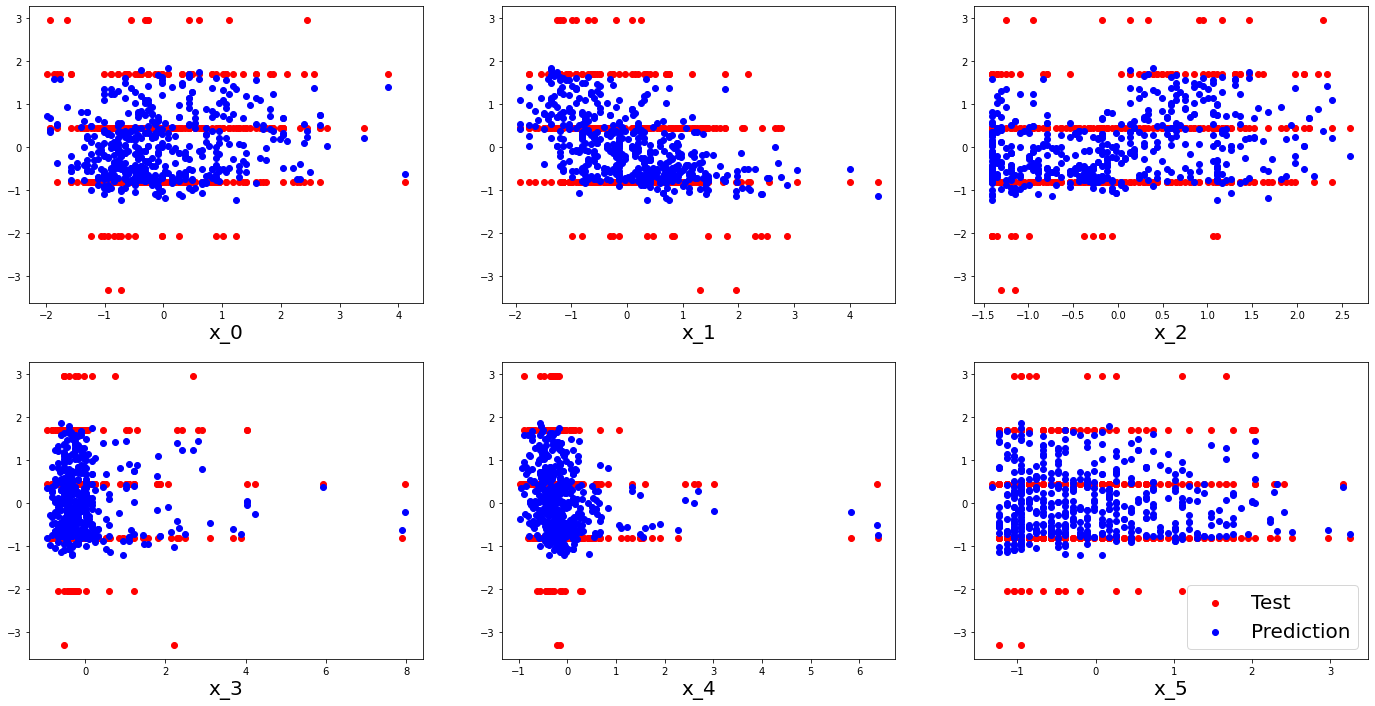

In [ ]:
import sklearn.kernel_ridge

# see https://scikit-learn.org/stable/modules/metrics.html#metrics for possible choices of kernels
sigma = 2**2.03





KRR = skl.kernel_ridge.KernelRidge(kernel='laplacian', alpha = 2**-2.19, gamma=1/(sigma))

KRR.fit(X_train_normal, Y_train_normal)

print("Train RMSE Laplacian Kernal",mean_squared_error(KRR.predict(X_train_normal),Y_train_normal))
print("Test RMSE Laplacian Kernal",mean_squared_error(KRR.predict(X_test_normal),Y_test_normal))

# use our fitted model to predict the Y values on the test set 
Y_pred_normal = KRR.predict(X_test_normal)

# plot the predicted values of Y against the test set

fig, ax = plt.subplots(2,3, figsize=(24,12))

for j in range(2):
  for i in range(3):

    ax[j][i].scatter( X_test_normal[:, i+ j*3], Y_test_normal, color='r', label='Test' )
    ax[j][i].scatter( X_test_normal[:, i+ j*3], Y_pred_normal, color='b', label='Prediction' )
    ax[j][i].set_xlabel('x_'+str(i + j*3), fontsize=20)

plt.legend(fontsize=20)

In [ ]:
Y_pred_normal = KRR.predict(X_new_normal)
Y_train_std*Y_pred_normal+Y_train_mean

array([6.03634177, 5.48592706, 5.62243028, 5.95697363, 5.99311587])

In [ ]:

K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.75, 2.25, K_sgm)
lmbd = np.linspace(-2.25, -1.75, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(sgm[i]))

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=10)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

In [ ]:
print(scores)

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()

print(ij_max)

print(scores.max())

print('log_2 sg:', sgm[ij_max[0]], 'log_2_lmbd: ', lmbd[ij_max[1]])

[[-0.54570265 -0.54576144 -0.54583686 -0.54592968 -0.54604066 -0.54617058
  -0.5463202  -0.54649029 -0.54668159 -0.54689485]
 [-0.54541429 -0.54545773 -0.54551786 -0.54559542 -0.5456912  -0.54580595
  -0.54594043 -0.5460954  -0.54627159 -0.54646974]
 [-0.5452135  -0.54524235 -0.54528796 -0.54535109 -0.54543249 -0.54553292
  -0.54565314 -0.54579388 -0.54595588 -0.54613987]
 [-0.54508691 -0.54510191 -0.54513376 -0.54518321 -0.54525103 -0.54533795
  -0.54544473 -0.5455721  -0.54572079 -0.5458915 ]
 [-0.54502317 -0.54502501 -0.54504381 -0.54508033 -0.54513531 -0.5452095
  -0.54530363 -0.54541844 -0.54555463 -0.5457129 ]
 [-0.54501259 -0.54500193 -0.54500837 -0.54503265 -0.54507552 -0.54513771
  -0.54521995 -0.54532295 -0.54544743 -0.54559406]
 [-0.5450469  -0.54502439 -0.54501912 -0.54503184 -0.54506328 -0.54511417
  -0.54518523 -0.54527716 -0.54539066 -0.54552641]
 [-0.54511906 -0.54508531 -0.54506896 -0.54507075 -0.54509141 -0.54513167
  -0.54519223 -0.54527378 -0.54537701 -0.54550259]
 

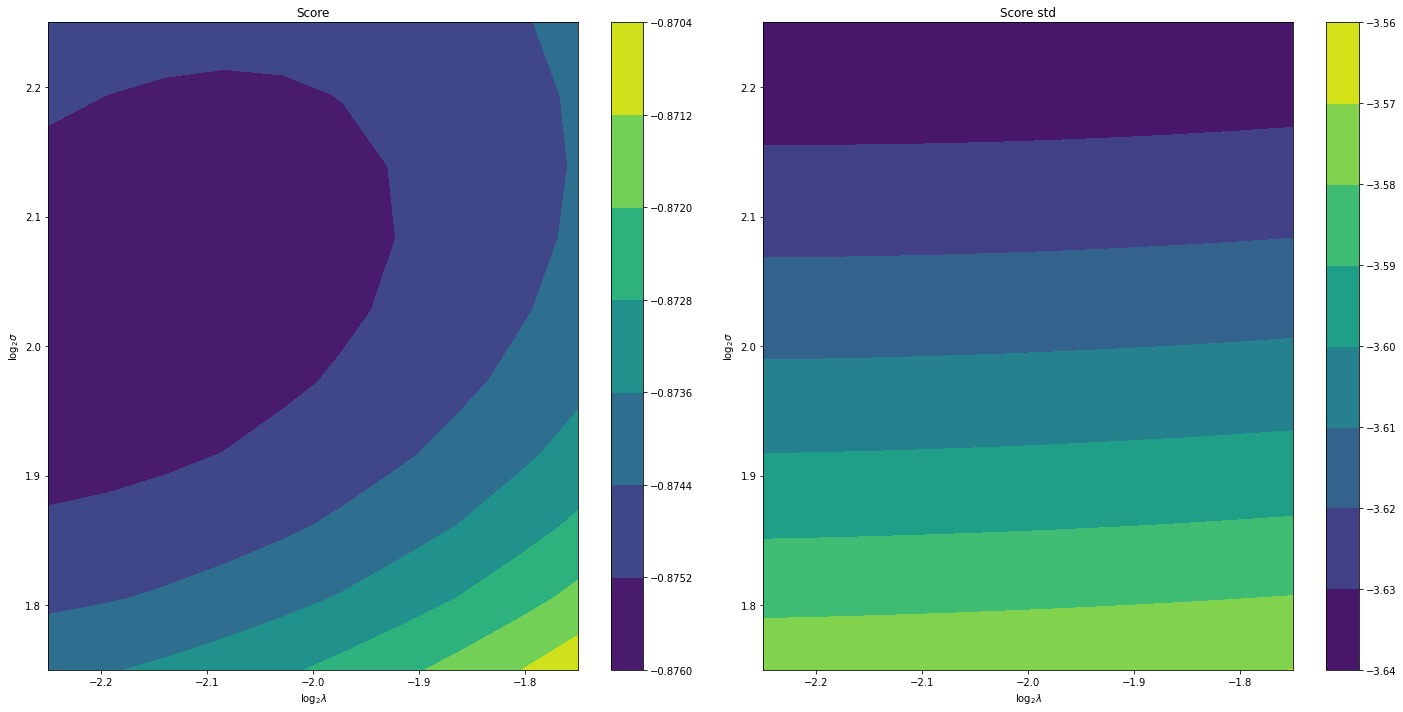

In [ ]:
lv, sv = np.meshgrid(lmbd, sgm)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")

#ax.scatter(sv, lv, np.log(scores))
#ax.set_xlabel('$\sigma$', fontsize=20)
#ax.set_ylabel('$\lambda$', fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf( lv, sv, np.log2(np.abs(scores)))
ax[0].set_xlabel('$\log_2\lambda$')
ax[0].set_ylabel('$\log_2\sigma$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])


cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std)))
ax[1].set_xlabel('$\log_2\lambda$')
ax[1].set_ylabel('$\log_2\sigma$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])


fig.tight_layout()